<a href="https://colab.research.google.com/github/parnika-dotcom/Snake_Game/blob/main/Task_01_Sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science and Business Analytics Intern**

##**The Sparks Foundation**

**Task1:- Prediction using Supervised Machine Learning**

***Name: Parnika Sharma***

**Aim:-To Predict the Percentage of a student based on the number of hourse of study hours** 

**Import the Required Libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

**Reading Data from Remote Link**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

**Data Cleaning and Preparation**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Here only two types of Data are available.

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since, there is no null data here, we conitnue without making any changes!

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking Outliers**


We will be using boxpot to check the presence of outliers


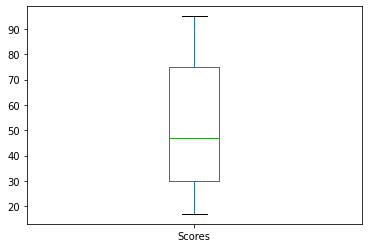

In [8]:
df['Scores'].plot.box()

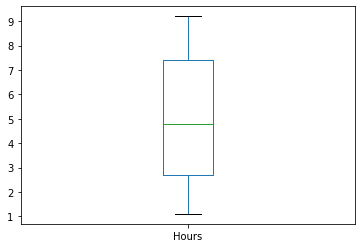

In [9]:
df['Hours'].plot.box()

From the above two plots, we conclude that there are no outliers present in the data since, no data point is located outside the whiskers of the box plot.

**Data Analysis and Visualization**


Analysis of Data using Graphs



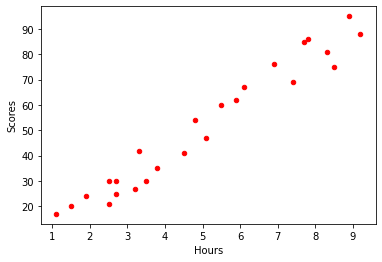

In [10]:
df.plot.scatter('Hours','Scores', color='r')

From the above graph, we infer that there is positive linear relationship between the two variables which can also be confirmed by finding the correlation between the two.

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Model Building**

Here, we will be diving the data into two categcategories i.e Train data and Test data and then we will perform simple linear regression for the problem.



In [12]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [13]:
x.shape

(25, 1)

In [14]:
y.shape

(25,)

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(x,y, random_state=0)

**Training The Model**

Fit the Data in the Linear Regression Model



In [16]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualization of the Model**

The regression line has the equation b0 + b1x



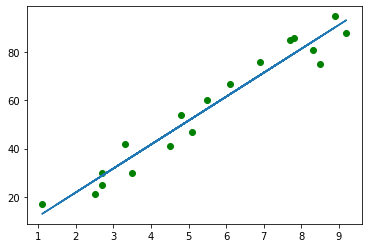

In [18]:
reg_line = lreg.intercept_ + lreg.coef_*x
plt.scatter(train_x, train_y, color ='g')
plt.plot(x,reg_line)
plt.show()

**Prediction**

After Training and Visualization of the Model, we make Predictions!



In [19]:
pred = lreg. predict(test_x)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [20]:
test_y

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [22]:
data = pd. DataFrame({'Actual Score' :np.array(test_y),'Predected Score':pred})
data

,Actual Score,Predected Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Prediction of score made by the student if he/she studies for 9.25 hours**

In [23]:
time=9.25
pred_score=lreg.predict([[time]])
pred_score

array([93.89272889])

So, here we see that the student will score appropriately 93.9 percent marks if he studies for 9.25 hours a day

**Model Evaluation**

We test the Model



In [24]:
lreg.score(test_x,test_y)

0.9367661043365056

In [25]:
lreg.score(train_x,train_y)

0.9484509249326872

Here, since the r^2 value of the training and the test data are almost equal, we can say that our model is quite perfect.

We check mean square error since, less error means our model is well fitted.



In [26]:
from sklearn import metrics
metrics.mean_squared_error(test_y,pred)

20.33292367497996

## **RESULT: For studying 9.25 hours per day a student is likely to score 94 percentage of marks(approximately).**